In [ ]:
import cv2
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import Reshape
from PIL import Image
import os, sys
!pip install tensorflow_addons
import tensorflow as tf
import tensorflow_addons as tfa
!pip install shutils
!pip install opencv-python-headless
from google.colab import drive
drive.mount('/content/drive')
import random
!pip install -q "tqdm>=4.36.1"
import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.0 MB/s eta 0:00:00
  Created wheel for shutils: filename=shutils-0.1.0-py3-none-any.whl size=3274 sha256=64503bd104c45b9f09e0efff8b860841636c49c48ef916bb189876b87ef9d9ab
  Stored in directory: /root/.cache/pip/wheels/62/63/04/81e549bdb44792d8b62938cffc3bd00a34addabe1da3693db8
Successfully built shutils


Mounted at /content/drive


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x = os.listdir("/content/drive/MyDrive/Deepfake_DS/Thats_Original/Noised/Real_noised")
print(len(x))

9894


In [ ]:
def retain_selected_images(folder_path, num_images_to_retain):
    all_files = os.listdir(folder_path)
    random.shuffle(all_files)
    num_files_to_delete = len(all_files) - num_images_to_retain
    for i in range(max(0,num_files_to_delete)):
        file_to_delete = os.path.join(folder_path, all_files[i])
        os.remove(file_to_delete)

def retain_selected_images2(folder_path, num_images_to_retain, output_folder):
  all_files = os.listdir(folder_path)
  random.shuffle(all_files)
  cnt = 0;
  for filename in all_files:
    cnt = cnt + 1
    if (cnt == num_images_to_retain):
      break
    input_file_path = os.path.join(folder_path, filename)
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
      image = cv2.imread(input_file_path)
      output_file_path = os.path.join(output_folder, filename)
      cv2.imwrite(output_file_path, image)

folder_path = '/content/drive/MyDrive/Deepfake_DS/Fake_One'
folder_path_2 = "/content/drive/MyDrive/Deepfake_DS/Real_One?"
folder_path_3 = '/content/drive/MyDrive/Deepfake_DS/Selected_Real'
num_images_to_retain = 9980
print(len(os.listdir(folder_path)))
retain_selected_images(folder_path, num_images_to_retain)
print(len(os.listdir(folder_path)))
print(len(os.listdir(folder_path_2)))
retain_selected_images2(folder_path_2, num_images_to_retain, folder_path_3)
print(len(os.listdir(folder_path_2)))

def resize_image(file_path):
    if not os.path.exists(file_path):
        print(f"Error: nhi ho rha")
        return
    try:
        with Image.open(file_path) as img:
            img_resized = img.resize((256, 256))
            img_resized.save(file_path)
        print(f"yaaayyyyy, done done {file_path}")
    except Exception as e:
        print(f"firse kat gaya, is baar image hi load nhi hui: {e}")

def resize_images_in_folder(folder_path):
    if not os.path.exists(folder_path):
        print(f"Error: resize_images_in_folder ko folder hi nhi mila ")
        return
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            file_path = os.path.join(folder_path, filename)
            resize_image(file_path)
            print(f"ho bhai run raam bharose:  {file_path}")
fake_dataset_raw = '/content/drive/MyDrive/Deepfake_DS/Fake_One'
real_dataset_raw = "/content/drive/MyDrive/Deepfake_DS/Selected_Real"
resize_images_in_folder(fake_dataset_raw)
resize_images_in_folder(real_dataset_raw)
# gaussian noise
def apply_gaussian_blur(input_folder, output_folder, kernel_size=(5, 5), sigma_x=0):
    if not os.path.exists(input_folder):
        print(f"gaussian blur whatttt? ssslyyy?")
        return
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    for filename in os.listdir(input_folder):
        input_file_path = os.path.join(input_folder, filename)
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            image = cv2.imread(input_file_path)
            try:
              blurred_image = cv2.GaussianBlur(image, kernel_size, sigma_x)
              output_file_path = os.path.join(output_folder, filename)
              cv2.imwrite(output_file_path, blurred_image)
              print(f"Gaussian blur to: {input_file_path} -> Saved to: {output_file_path}, sucksecsful")
            except:
              pass

input_folder_for_fake = fake_dataset_raw
input_folder_for_real = real_dataset_raw
output_folder_for_fake_blurred = "/content/drive/MyDrive/Deepfake_DS/Thats_Original/Gaussian/Fake_Gaussian"
output_folder_for_real_blurred = "/content/drive/MyDrive/Deepfake_DS/Thats_Original/Gaussian/Real_Gaussian"
apply_gaussian_blur(input_folder_for_fake, output_folder_for_fake_blurred)
apply_gaussian_blur(input_folder_for_real, output_folder_for_real_blurred)

# gaussian noise
def apply_gaussian_noise(input_folder, output_folder, mean=0, sigma=25):
    if not os.path.exists(input_folder):
        print(f"Error: Input folder '{input_folder}' not found.")
        return
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    for filename in os.listdir(input_folder):
        input_file_path = os.path.join(input_folder, filename)
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            image = cv2.imread(input_file_path)
            try:
              gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
              noisy_image = cv2.add(image, gaussian_noise)
              output_file_path = os.path.join(output_folder, filename)
              cv2.imwrite(output_file_path, noisy_image)
              print(f"10000 decibels: {input_file_path} -> Saved to: {output_file_path}")
            except:
              pass

input_folder_for_fake = fake_dataset_raw
input_folder_for_real = real_dataset_raw
output_folder_for_fake_noise = "/content/drive/MyDrive/Deepfake_DS/Thats_Original/Noised/Fake_noised"
output_folder_for_real_noise = "/content/drive/MyDrive/Deepfake_DS/Thats_Original/Noised/Real_noised"
apply_gaussian_noise(input_folder_for_fake, output_folder_for_fake_noise)
apply_gaussian_noise(input_folder_for_real, output_folder_for_real_noise)

Streaming output truncated to the last 5000 lines.
10000 decibels: /content/drive/MyDrive/Deepfake_DS/Selected_Real/11280.jpg -> Saved to: /content/drive/MyDrive/Deepfake_DS/Thats_Original/Noised/Real_noised/11280.jpg
10000 decibels: /content/drive/MyDrive/Deepfake_DS/Selected_Real/03826.jpg -> Saved to: /content/drive/MyDrive/Deepfake_DS/Thats_Original/Noised/Real_noised/03826.jpg
10000 decibels: /content/drive/MyDrive/Deepfake_DS/Selected_Real/10431.jpg -> Saved to: /content/drive/MyDrive/Deepfake_DS/Thats_Original/Noised/Real_noised/10431.jpg
10000 decibels: /content/drive/MyDrive/Deepfake_DS/Selected_Real/19938.jpg -> Saved to: /content/drive/MyDrive/Deepfake_DS/Thats_Original/Noised/Real_noised/19938.jpg
10000 decibels: /content/drive/MyDrive/Deepfake_DS/Selected_Real/18478.jpg -> Saved to: /content/drive/MyDrive/Deepfake_DS/Thats_Original/Noised/Real_noised/18478.jpg
10000 decibels: /content/drive/MyDrive/Deepfake_DS/Selected_Real/11855.jpg -> Saved to: /content/drive/MyDrive/Dee

Found 19872 files belonging to 2 classes.
Using 15898 files for training.
classes names that you have:  ['Fake_noised', 'Real_noised']
Found 19872 files belonging to 2 classes.
Using 3974 files for validation.


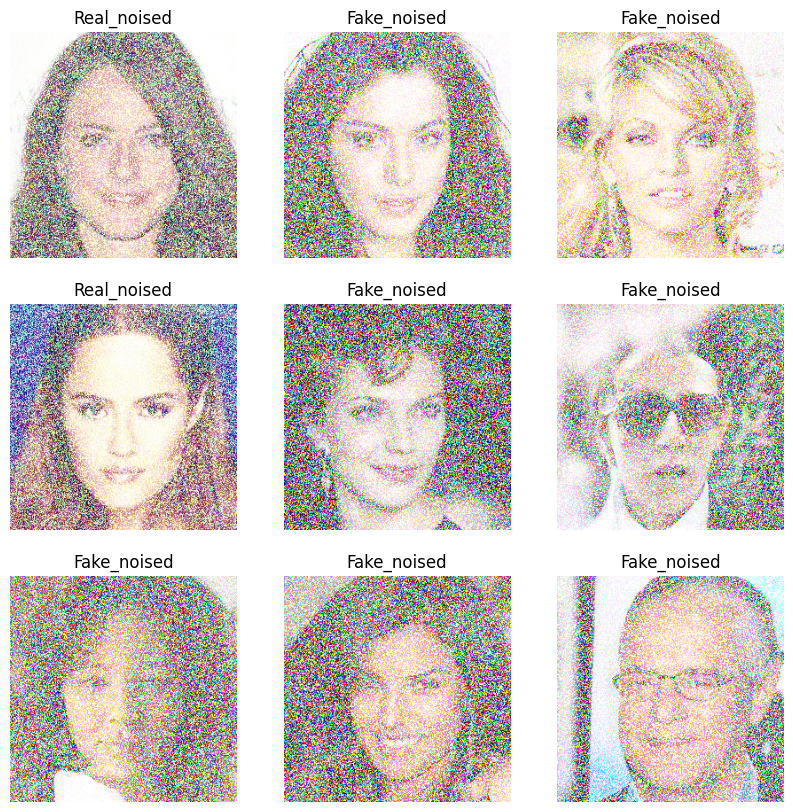

In [ ]:
import tensorflow as tf
dataset_path = '/content/drive/MyDrive/Deepfake_DS/Thats_Original/Gaussian'
dataset_path_2 = '/content/drive/MyDrive/Deepfake_DS/Thats_Original/Noised'
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path_2,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256,256),
  batch_size= 10)
class_names = train_ds.class_names
print(f"classes names that you have:  {class_names}")

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


validation_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path_2,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=10
)



In [ ]:
def define_discriminator():

    model = Sequential()
    model.add(Conv2D(128, (4, 4), strides=(2, 2), padding='same', input_shape=(256, 256, 3)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(1024, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dropout(0.4))

    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

model = define_discriminator()
checkpoint_path = "/content/drive/MyDrive/Deepfake_DS/Model_Weights.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
tqdm_callback = tfa.callbacks.TQDMProgressBar()

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
model.fit(train_ds,validation_data=validation_ds, epochs=5, callbacks = [cp_callback, tqdm_callback], verbose = 0, use_multiprocessing = True)

Training:   0%|           0/5 ETA: ?s,  ?epochs/s

Epoch 1/5


0/1590           ETA: ?s - 

In [ ]:
predictions = model.predict(validation_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels from the validation dataset
true_labels = np.concatenate([y for _, y in validation_ds], axis=0)

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)

print(f"Validation Accuracy: {accuracy * 100:.2f}%")

In [ ]:
def generator():
    # Encoder
    inputs = tf.keras.layers.Input(shape=(256, 256, 3))
    conv1 = layers.Conv2D(64, (3, 3), padding='same', strides = (2,2))(inputs)
    conv1 = layers.LeakyReLU()(conv1)
    # add skip
    conv2 = layers.Conv2D(128, (3,3), padding = 'same', strides = (2,2))(conv1)
    conv2 = layers.BatchNormalization()(conv2)
    conv2 = layers.LeakyReLU()(conv2)
    # add skip
    conv3 = layers.Conv2D(256, (3,3), padding = 'same', strides = (2,2))(conv2)
    conv3 = layers.BatchNormalization()(conv3)
    conv3 = layers.LeakyReLU()(conv3)
    # add skip
    conv4 = layers.Conv2D(512, (3,3), padding = 'same', strides = (2,2))(conv3)
    conv4 = layers.BatchNormalization()(conv4)
    conv4 = layers.LeakyReLU()(conv4)
    #add skip
    conv5 = layers.Conv2D(512, (3,3), padding = 'same', strides = (2,2))(conv4)
    conv5 = layers.BatchNormalization()(conv5)
    conv5 = layers.LeakyReLU()(conv5)
    #add skip
    conv6 = layers.Conv2D(512, (3,3), padding = 'same', strides = (2,2))(conv5)
    conv6 = layers.BatchNormalization()(conv6)
    conv6 = layers.LeakyReLU()(conv6)
    #add skip
    conv7 = layers.Conv2D(512, (3,3), padding = 'same', strides = (2,2))(conv6)
    conv7 = layers.BatchNormalization()(conv7)
    conv7 = layers.LeakyReLU()(conv7)
    #add skip
    conv8 = layers.Conv2D(512, (3,3), padding = 'same', strides = (2,2))(conv7)
    conv8 = tf.keras.layers.Activation('relu')(conv8)
    ## reversal starts here.
    # add conv2d transpose.
    conv_trans = layers.Conv2DTranspose(512, (3,3), padding = 'same', strides = (2,2))(conv8)
    conv_trans = layers.BatchNormalization()(conv_trans)
    conv_trans = layers.Dropout(0.4)(conv_trans)
    merge1 = layers.concatenate([conv7, conv_trans], axis=3)
    merge1 = tf.keras.layers.Activation('relu')(merge1)
    #2nd trns layer
    conv_trans2 = layers.Conv2DTranspose(512, (3,3), padding = 'same', strides = (2,2))(merge1)
    conv_trans2 = layers.BatchNormalization()(conv_trans2)
    conv_trans2 = layers.Dropout(0.4)(conv_trans2)
    merge2 = layers.concatenate([conv6, conv_trans2], axis=3)
    merge2 = tf.keras.layers.Activation('relu')(merge2)
    #3rd trns layer
    conv_trans3 = layers.Conv2DTranspose(512, (3,3), padding = 'same', strides = (2,2))(merge2)
    conv_trans3 = layers.BatchNormalization()(conv_trans3)
    conv_trans3 = layers.Dropout(0.4)(conv_trans3)
    merge3 = layers.concatenate([conv5, conv_trans3], axis=3)
    merge3 = tf.keras.layers.Activation('relu')(merge3)
    #4th trns layer
    conv_trans4 = layers.Conv2DTranspose(512, (3,3), padding = 'same', strides = (2,2))(merge3)
    conv_trans4 = layers.BatchNormalization()(conv_trans4)
    merge4 = layers.concatenate([conv4, conv_trans4], axis=3)
    merge4 = tf.keras.layers.Activation('relu')(merge4)
    # fifth trns layer
    conv_trans5 = layers.Conv2DTranspose(256, (3,3), padding = 'same', strides = (2,2))(merge4)
    conv_trans5 = layers.BatchNormalization()(conv_trans5)
    merge5 = layers.concatenate([conv3, conv_trans5], axis=3)
    merge5 = tf.keras.layers.Activation('relu')(merge5)
    # sixth trns layer
    conv_trans6 = layers.Conv2DTranspose(128, (3,3), padding = 'same', strides = (2,2))(merge5)
    conv_trans6 = layers.BatchNormalization()(conv_trans6)
    merge6 = layers.concatenate([conv2, conv_trans6], axis=3)
    merge6 = tf.keras.layers.Activation('relu')(merge6)
    # seventh trns layer
    conv_trans7 = layers.Conv2DTranspose(64, (3,3), padding = 'same', strides = (2,2))(merge6)
    conv_trans7 = layers.BatchNormalization()(conv_trans7)
    merge7 = layers.concatenate([conv1, conv_trans7], axis=3)
    merge7 = tf.keras.layers.Activation('relu')(merge7)
    # final
    conv_trans8 = layers.Conv2DTranspose(3, (3,3), padding = 'same', strides = (2,2))(merge7)
    conv_trans8 = tf.keras.layers.Activation('relu')(conv_trans8)
    return tf.keras.Model(inputs, conv_trans8)


def define_discriminator_hehe():
    model = Sequential()
    gen = generator()
    model.add(gen)
    model.add(Conv2D(128, (4, 4), strides=(2, 2), padding='same', input_shape=(256, 256, 3)))

    model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(1024, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dropout(0.4))

    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=0.000002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

model_u = define_discriminator_hehe()
model_u.fit(train_ds, epochs=10)

NameError: name 'layers' is not defined

In [ ]:
predictions = model_u.predict(validation_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels from the validation dataset
true_labels = np.concatenate([y for _, y in validation_ds], axis=0)

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)

print(f"Validation Accuracy: {accuracy * 100:.2f}%")